In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("loan_data_set.csv")
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.drop('Loan_ID',inplace = True,axis = 1)

In [4]:
round(df.isnull().mean()*100,2)

Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [5]:
df.shape

(614, 12)

In [6]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

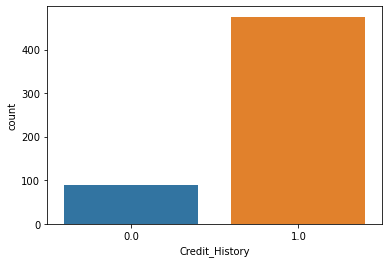

In [7]:
sns.countplot(x="Credit_History", data=df)
plt.show()

In [8]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

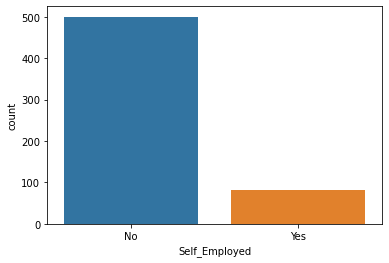

In [9]:
sns.countplot(x="Self_Employed", data=df)
plt.show()

In [10]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

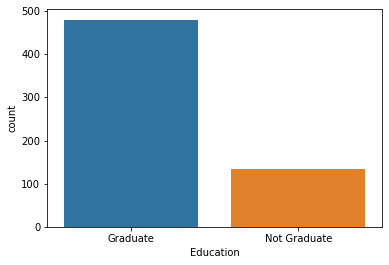

In [11]:
sns.countplot(x="Education", data=df)
plt.show()

In [12]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

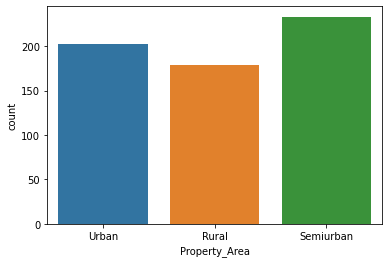

In [13]:
sns.countplot(x="Property_Area", data=df)
plt.show()

In [14]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

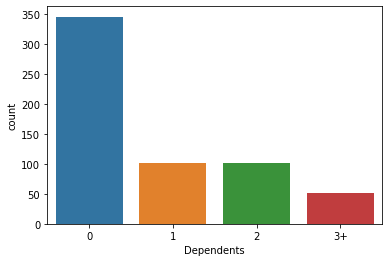

In [15]:
sns.countplot(x="Dependents", data=df)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [17]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
lb=LabelEncoder()

In [20]:
df["Gender"]=lb.fit_transform(df["Gender"])
df["Married"]=lb.fit_transform(df["Married"])
df["Education"]=lb.fit_transform(df["Education"])
df["Self_Employed"]=lb.fit_transform(df["Self_Employed"])
df["Property_Area"]=lb.fit_transform(df["Property_Area"])
df["Loan_Status"]=lb.fit_transform(df["Loan_Status"])
df["Dependents"]=lb.fit_transform(df["Dependents"])

In [21]:
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [23]:
x = df.iloc[:,0:11]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [24]:
from sklearn.preprocessing import MinMaxScaler  #To standarized
X = MinMaxScaler().fit_transform(x)

In [25]:
X

array([[1.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        1.        ],
       [1.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        0.5       ]])

In [26]:
y = df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [27]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 8)

# Logistic Regression

In [29]:
model = LogisticRegression()
LR=model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mean_squared_error(y_test, y_pred)

0.11382113821138211

In [30]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[19, 14],
       [ 0, 90]], dtype=int64)

C:\Users\User24\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


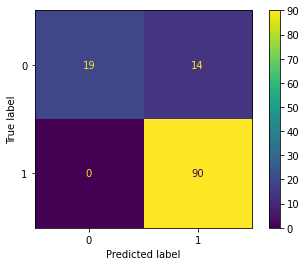

In [31]:
plot_confusion_matrix(LR,x_test,y_test)

In [32]:
LRaccuracy=accuracy_score(y_test, y_pred)
LRaccuracy   #0.8861788617886179

0.8861788617886179

# Decision Tree

In [33]:
classifier2 = DecisionTreeClassifier(random_state=8)
classifier2.fit(x_train, y_train)

y_pred2 = classifier2.predict(x_test)

print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.43      0.55      0.48        33
           1       0.81      0.73      0.77        90

    accuracy                           0.68       123
   macro avg       0.62      0.64      0.63       123
weighted avg       0.71      0.68      0.69       123

[[18 15]
 [24 66]]


In [34]:
DTaccuracy = accuracy_score(y_pred2,y_test)
DTaccuracy    #0.6829268292682927

0.6829268292682927

# Random Forest

In [35]:
classifier3 = RandomForestClassifier(random_state=8)
classifier3.fit(x_train, y_train)

y_pred3 = classifier3.predict(x_test)

print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.58      0.69        33
           1       0.86      0.97      0.91        90

    accuracy                           0.86       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.86      0.86      0.85       123

[[19 14]
 [ 3 87]]


In [36]:
RFaccuracy = accuracy_score(y_pred3,y_test)
RFaccuracy  #0.8617886178861789

0.8617886178861789

In [37]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 
                                  'Random Forest'], 
                        'Accuracy': [LRaccuracy*100, DTaccuracy*100,
                                     RFaccuracy*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,88.617886
2,Random Forest,86.178862
1,Decision Tree,68.292683


# Pickle File

In [38]:
import pickle

pickle.dump(LR,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))